In [31]:
import pandas as pd # manipulation des tableaux
import numpy as np # calcul matriciel, algebrique
import matplotlib.pyplot as plt # visualisation graphique des donnees, pyplot pour le tracage des graphiques en 2D
import seaborn as sns # manipulation des statistiques

In [32]:
import warnings # generer les erreurs et les alertes
warnings.filterwarnings("ignore") # ignorer les alertes

In [33]:
df = pd.read_csv("Churn_Modelling.csv") #importer la base de donnée
df.shape

(10000, 14)

In [34]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [36]:
df.shape

(10000, 11)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [38]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [46]:
df.describe(include='object')

,Geography,Gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [39]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: xlabel='Exited'>

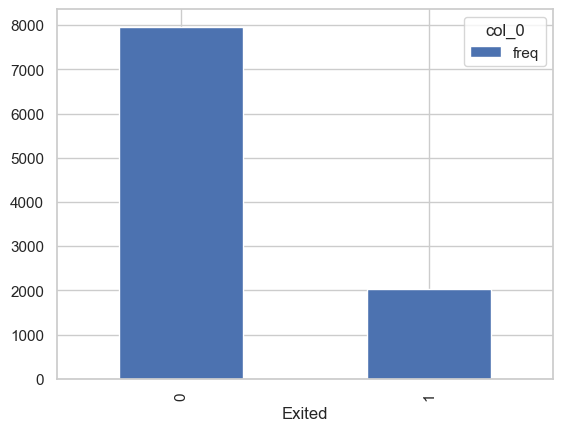

In [44]:
pd.crosstab(df.Exited, 'freq').plot.bar()

array([<Axes: ylabel='freq'>], dtype=object)

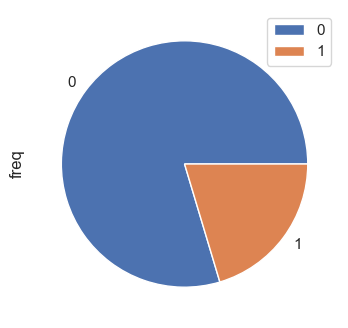

In [45]:
pd.crosstab(df.Exited, 'freq').plot.pie(subplots=True, figsize = (4, 4))

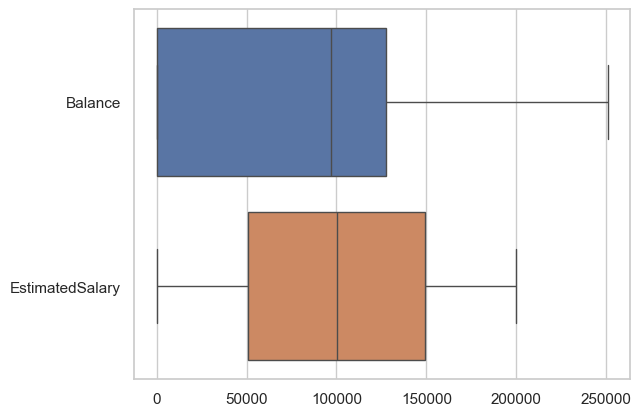

In [47]:
list_plot = ['Balance','EstimatedSalary']

sns.set_theme(style='whitegrid')
sns.boxplot(data=df[list_plot], orient='h')
plt.show()

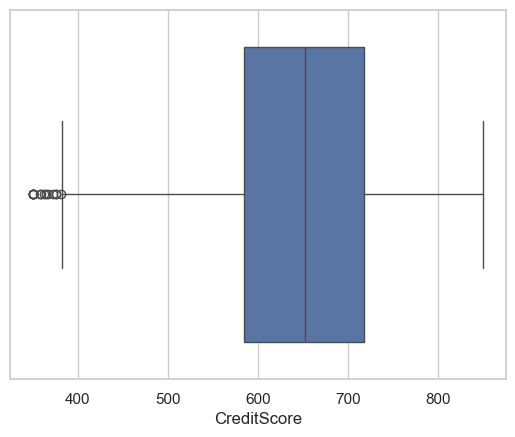

In [ ]:
sns.set_theme(style='whitegrid')
sns.boxplot(df['CreditScore'],orient='h')
plt.show()

In [ ]:
q1 = df['CreditScore'].quantile(0.25)
q2 = df['CreditScore'].quantile(0.75)
IQR = q2-q1
b_inf = q1-1.5*IQR
b_sup = q2+1.5*IQR
df = df[df['CreditScore']>b_inf]
df = df[df['CreditScore']<b_sup]

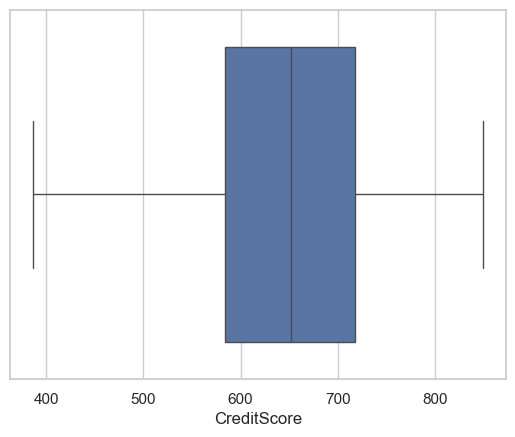

In [ ]:
sns.set_theme(style='whitegrid')
sns.boxplot(df['CreditScore'],orient='h')
plt.show()

In [51]:
x = df.iloc[:, :10].values
y = df.iloc[:, 10].values

In [52]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('state',OneHotEncoder(),[1, 2])],remainder='passthrough')
x=ct.fit_transform(x)

In [53]:
x[0:5,:]

array([[1.0, 0.0, 0.0, 1.0, 0.0, 619, 42, 2, 0.0, 1, 1, 1, 101348.88],
       [0.0, 0.0, 1.0, 1.0, 0.0, 608, 41, 1, 83807.86, 1, 0, 1,
        112542.58],
       [1.0, 0.0, 0.0, 1.0, 0.0, 502, 42, 8, 159660.8, 3, 1, 0,
        113931.57],
       [1.0, 0.0, 0.0, 1.0, 0.0, 699, 39, 1, 0.0, 2, 0, 0, 93826.63],
       [0.0, 0.0, 1.0, 1.0, 0.0, 850, 43, 2, 125510.82, 1, 1, 1, 79084.1]],
      dtype=object)

In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state =0 )
x_train.shape

(8000, 13)

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [56]:
lr.coef_

array([-4.97573168e-02,  8.51870838e-02, -3.54297669e-02,  3.84820158e-02,
       -3.84820158e-02, -1.02286880e-04,  1.10482472e-02, -3.66839519e-03,
        2.82465304e-07, -2.24965075e-02, -5.91083735e-03, -1.36808067e-01,
        7.41555987e-08])

In [57]:
lr.intercept_

-0.043647992488685616

In [59]:
lr.coef_[0]

-0.04975731683487222

In [61]:
y_pred = lr.predict(x_train)

for i in range(10):
    print([y_train[i],y_pred[i]])

[0, 0.20972244414432273]
[0, 0.28013469420420767]
[0, 0.22051369509946317]
[0, 0.25345181156358043]
[0, 0.33077199939986635]
[0, 0.39489573369125586]
[0, 0.3150208007834292]
[0, 0.06920155374915597]
[0, 0.49751384733861687]
[0, 0.21733985088803093]


In [62]:
y_test_pred_prob = lr.predict_proba(x_test)[:,1]

AttributeError: 'LinearRegression' object has no attribute 'predict_proba'

In [ ]:
from sklearn import metrics
fpr, tpr, thr